In [1]:
 # Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [3]:
#reading whale returns
whale_data=Path('whale_returns.csv')
whale_df=pd.read_csv(whale_data,index_col='Date')
#count nulls
whale_df.isnull().sum()
#drop nulls
whale_df.dropna(inplace=True)

In [4]:
#reading algorithmic returns
algo_data=Path('algo_returns.csv')
algo_df=pd.read_csv(algo_data,index_col='Date')
#count nulls
algo_df.isnull().sum()
#drop nulls
algo_df.dropna(inplace=True)

In [8]:
#reading S&P 500 closing prices
sp500=Path('sp500_history.csv')
sp500_df=pd.read_csv(sp500, index_col="Date")
#check data types
sp500_df.dtypes
sp500_df


,Close
Date,
23-Apr-19,$2933.68
22-Apr-19,$2907.97
18-Apr-19,$2905.03
17-Apr-19,$2900.45
16-Apr-19,$2907.06
...,...
5-Oct-12,$1460.93
4-Oct-12,$1461.40
3-Oct-12,$1450.99


In [9]:
#fix data types
#Removing $ and , to later make column in float format
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].str.replace(",", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes
sp500_df

,Close
Date,
23-Apr-19,2933.68
22-Apr-19,2907.97
18-Apr-19,2905.03
17-Apr-19,2900.45
16-Apr-19,2907.06
...,...
5-Oct-12,1460.93
4-Oct-12,1461.40
3-Oct-12,1450.99


In [10]:
#calculate daily returns
sp500_daily_returns=sp500_df.pct_change()
sp500_daily_returns

,Close
Date,
23-Apr-19,NaN
22-Apr-19,-0.008764
18-Apr-19,-0.001011
17-Apr-19,-0.001577
16-Apr-19,0.002279
...,...
5-Oct-12,0.003469
4-Oct-12,0.000322
3-Oct-12,-0.007123


In [11]:
#drop nulls
sp500_daily_returns.dropna().copy()
sp500_daily_returns

,Close
Date,
23-Apr-19,NaN
22-Apr-19,-0.008764
18-Apr-19,-0.001011
17-Apr-19,-0.001577
16-Apr-19,0.002279
...,...
5-Oct-12,0.003469
4-Oct-12,0.000322
3-Oct-12,-0.007123


In [12]:
#rename 'Close' column to be specific to this portfolio
sp500_daily_returns=sp500_daily_returns.rename(columns={'Close':'Final Count'})
sp500_daily_returns

,Final Count
Date,
23-Apr-19,NaN
22-Apr-19,-0.008764
18-Apr-19,-0.001011
17-Apr-19,-0.001577
16-Apr-19,0.002279
...,...
5-Oct-12,0.003469
4-Oct-12,0.000322
3-Oct-12,-0.007123


In [13]:
 # Join Whale Returns, Algorithmic Returns, and 
#the S&P 500 Returns into a single DataFrame with 
#columns for each portfolio's returns.
combined_df=pd.concat([whale_df,algo_df,sp500_daily_returns],axis='columns',join='outer')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Final Count
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,NaN
...,...,...,...,...,...,...,...
5-Oct-12,NaN,NaN,NaN,NaN,NaN,NaN,0.003469
4-Oct-12,NaN,NaN,NaN,NaN,NaN,NaN,0.000322
3-Oct-12,NaN,NaN,NaN,NaN,NaN,NaN,-0.007123


<Axes: xlabel='Date'>

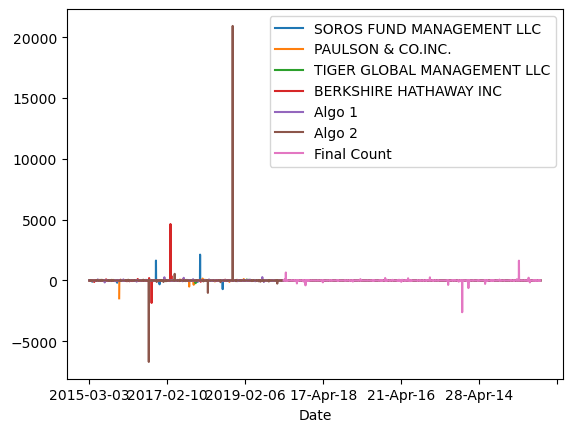

In [14]:
 # Plot daily returns of all portfolios
combined_daily_returns=combined_df.pct_change()
combined_daily_returns.plot()

C:\Users\awhun\anaconda3\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


<Axes: xlabel='Date'>

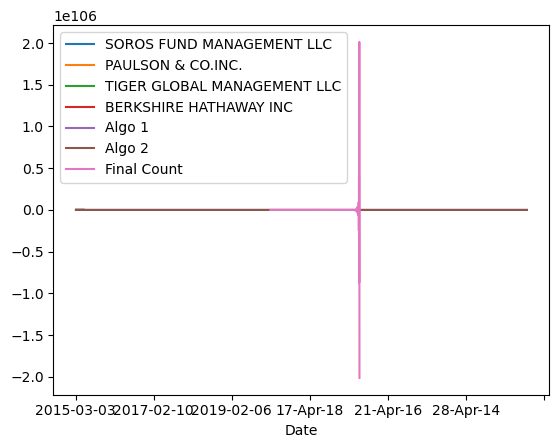

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns=(1+combined_daily_returns-1).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

<Axes: xlabel='Date'>

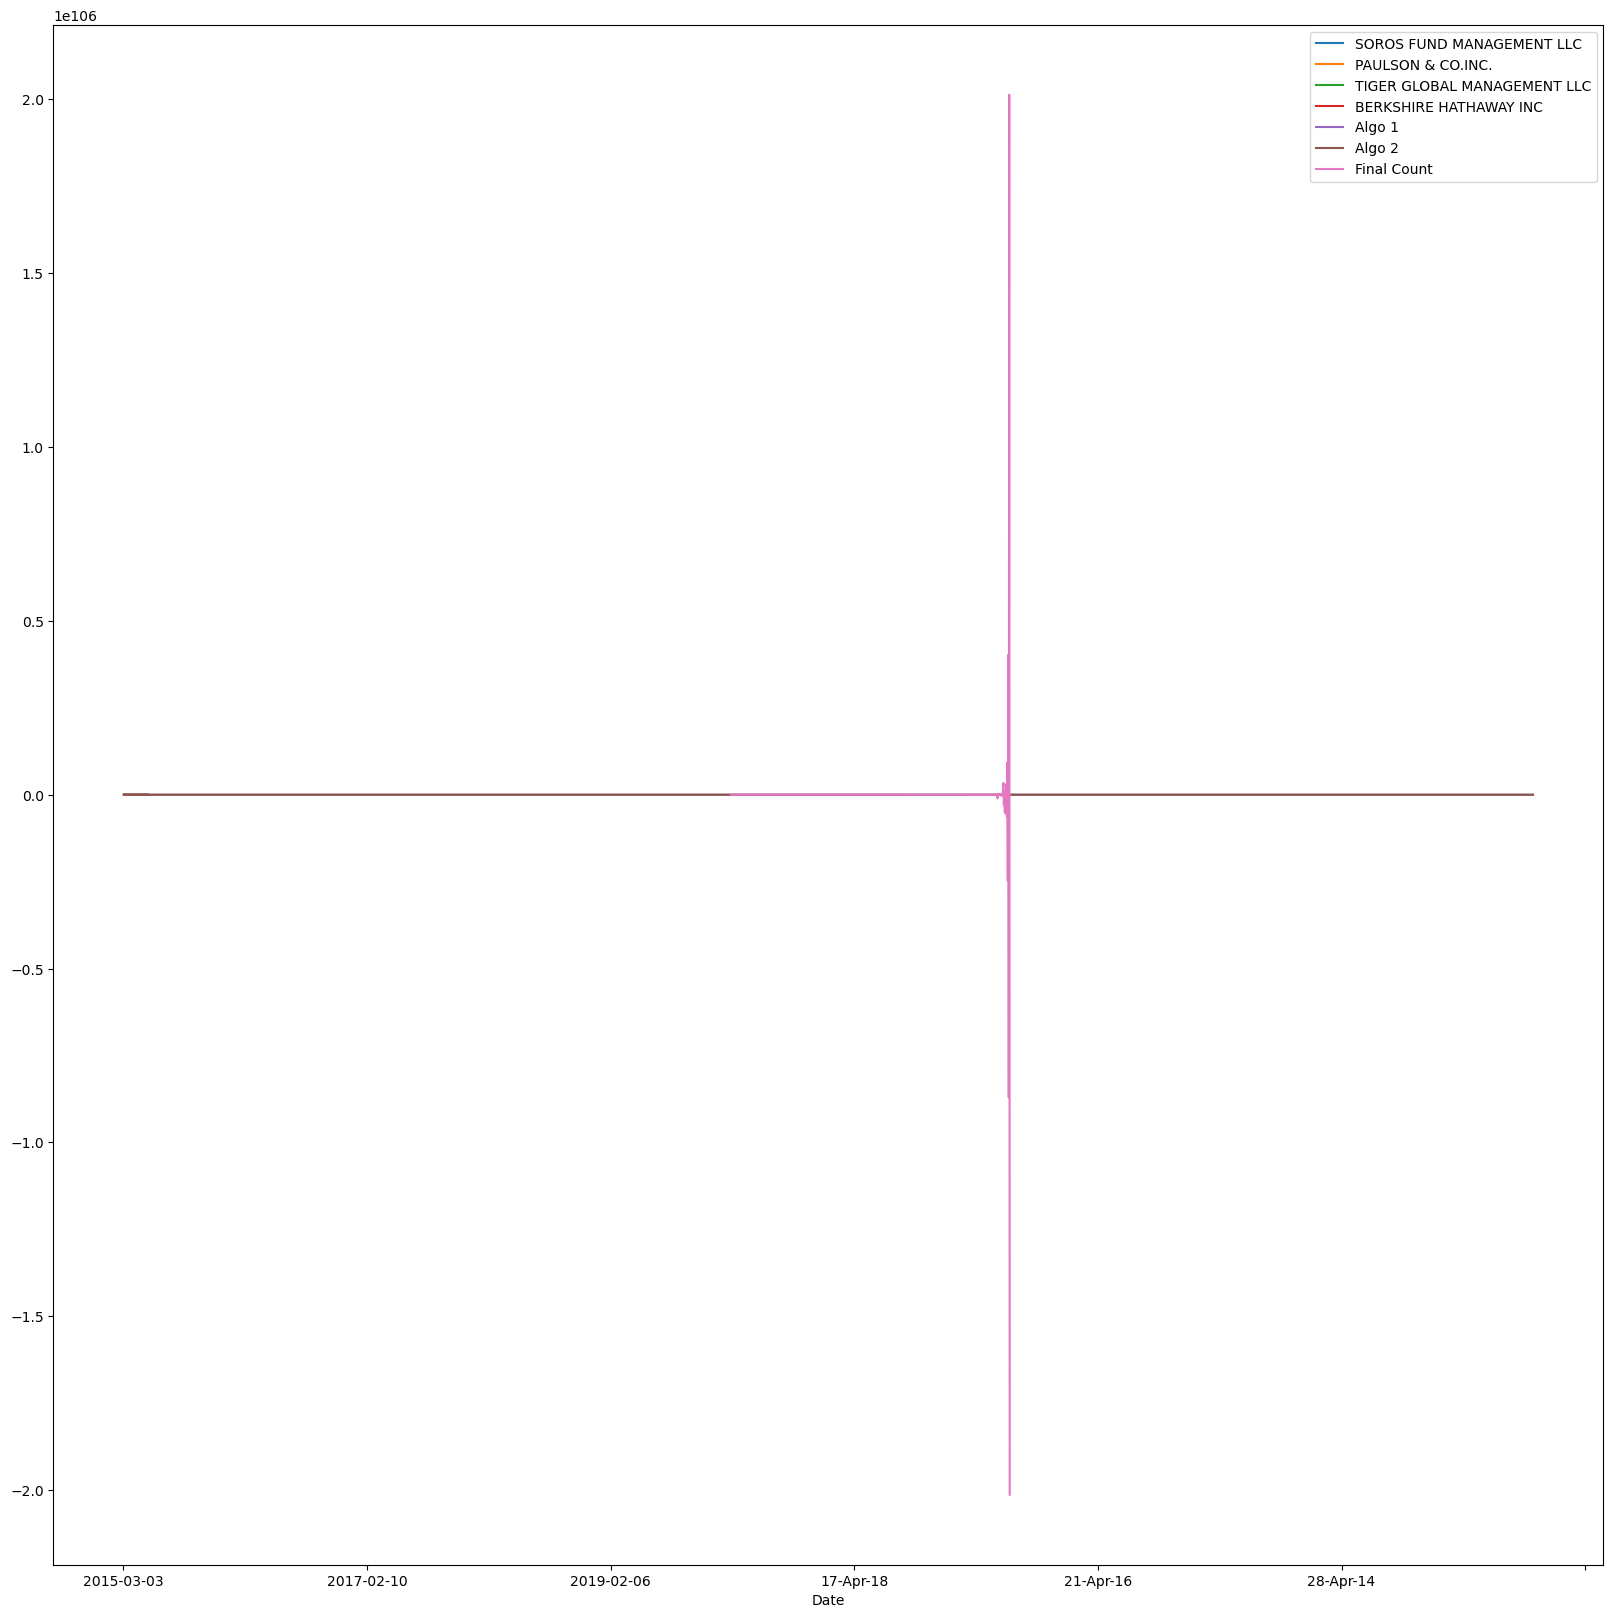

In [17]:
# Box plot to visually show risk
cumulative_returns.plot(figsize=(20,20))

In [18]:
# Calculate the daily standard deviations of all portfolios
cumulative_returns.std()

SOROS FUND MANAGEMENT LLC               NaN
PAULSON & CO.INC.                       NaN
TIGER GLOBAL MANAGEMENT LLC             NaN
BERKSHIRE HATHAWAY INC                  NaN
Algo 1                         2.111441e+13
Algo 2                         7.700199e+21
Final Count                             NaN
dtype: float64

In [ ]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500

In [ ]:
# Calculate the annualized standard deviation (252 trading days)

In [ ]:

# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation

In [ ]:
# Calculate the correlation

# Display the correlation matrix

In [ ]:
 # Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend

In [ ]:
# Use `ewm` to calculate the rolling window

In [ ]:
# Annualized Sharpe Ratio

# Visualize the sharpe ratios as a bar plot
 

In [ ]:
 # Reading data from 1st stock
    
  # Reading data from 2nd stock

  # Reading data from 3rd stock
    
  # Combine all stocks in a single DataFrame

  # Reset Date index
    
  # Reorganize portfolio data by having a column per symbol

  # Calculate daily returns

# Drop NAs

# Display sample data

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data

In [ ]:
# Join your returns DataFrame to the original returns DataFrame

# Only compare dates where return data exists for all the stocks (drop NaNs)

In [ ]:
# Calculate the annualized `std'

In [ ]:
 # Calculate rolling standard deviation

# Plot rolling standard deviation

In [ ]:
# Calculate and plot the correlation

In [ ]:
# Calculate and plot Beta

In [ ]:
 # Calculate Annualized Sharpe Ratios
    
# Visualize the sharpe ratios as a bar plot